In [112]:
import numpy as np
import pandas as pd

In [113]:
##Importação dos dados de treino

In [114]:
fd001_train = pd.read_csv("train_FD001.txt",
                    sep='\s+',
                    header= None)  

fd001_test = pd.read_csv("test_FD001.txt",
                    sep='\s+',
                    header= None) 

rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None) 

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\davim\AppData\Local\Temp\ipykernel_20132\2366027756.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_20132\2366027756.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_20132\2366027756.py:9: SyntaxWarning: invalid escape sequence '\s'
  rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None)


In [115]:
##Remoção de colunas inteiramente preenchidas por NaN

In [116]:
fd001_train = fd001_train.dropna(axis=1,how='all')
fd001_test = fd001_test.dropna(axis=1,how='all')

In [117]:
##Introdução do cabeçalho do data frame

In [118]:
cabecalho1 = ["ID","Nº Ciclos","Altitude [ft]", "Mach","TRA", "T2 [°R]", "T24 [°R]", "T30 [°R]", 
             "T50[°R]", "P2 [psia]", "P15 [psia]", "P30 [psia]", "Nf [rpm]", "Nc [rpm]", "epr [-]",
             "Ps30 [psia]", "phi [pps/psi]", "NRf [rpm]", "NRc [rpm]", "BPR [-]", "farB [-]",
             "htBleed [-]", "Nf_dmd [rpm]", "PCNfR_dmd [rpm]", "W31 [lbm/s]", "W32 [lbm/s]"] 
fd001_train.columns = cabecalho1 
fd001_test.columns = cabecalho1  
cabecalho2 = ["rul"]
rul001.columns = cabecalho2

print(fd001_train.head())

   ID  Nº Ciclos  Altitude [ft]    Mach    TRA  T2 [°R]  T24 [°R]  T30 [°R]  \
0   1          1        -0.0007 -0.0004  100.0   518.67    641.82   1589.70   
1   1          2         0.0019 -0.0003  100.0   518.67    642.15   1591.82   
2   1          3        -0.0043  0.0003  100.0   518.67    642.35   1587.99   
3   1          4         0.0007  0.0000  100.0   518.67    642.35   1582.79   
4   1          5        -0.0019 -0.0002  100.0   518.67    642.37   1582.85   

   T50[°R]  P2 [psia]  ...  phi [pps/psi]  NRf [rpm]  NRc [rpm]  BPR [-]  \
0  1400.60      14.62  ...         521.66    2388.02    8138.62   8.4195   
1  1403.14      14.62  ...         522.28    2388.07    8131.49   8.4318   
2  1404.20      14.62  ...         522.42    2388.03    8133.23   8.4178   
3  1401.87      14.62  ...         522.86    2388.08    8133.83   8.3682   
4  1406.22      14.62  ...         522.19    2388.04    8133.80   8.4294   

   farB [-]  htBleed [-]  Nf_dmd [rpm]  PCNfR_dmd [rpm]  W31 [lbm/s]

In [119]:
##Geração de Histogramas e seleção de variáveis

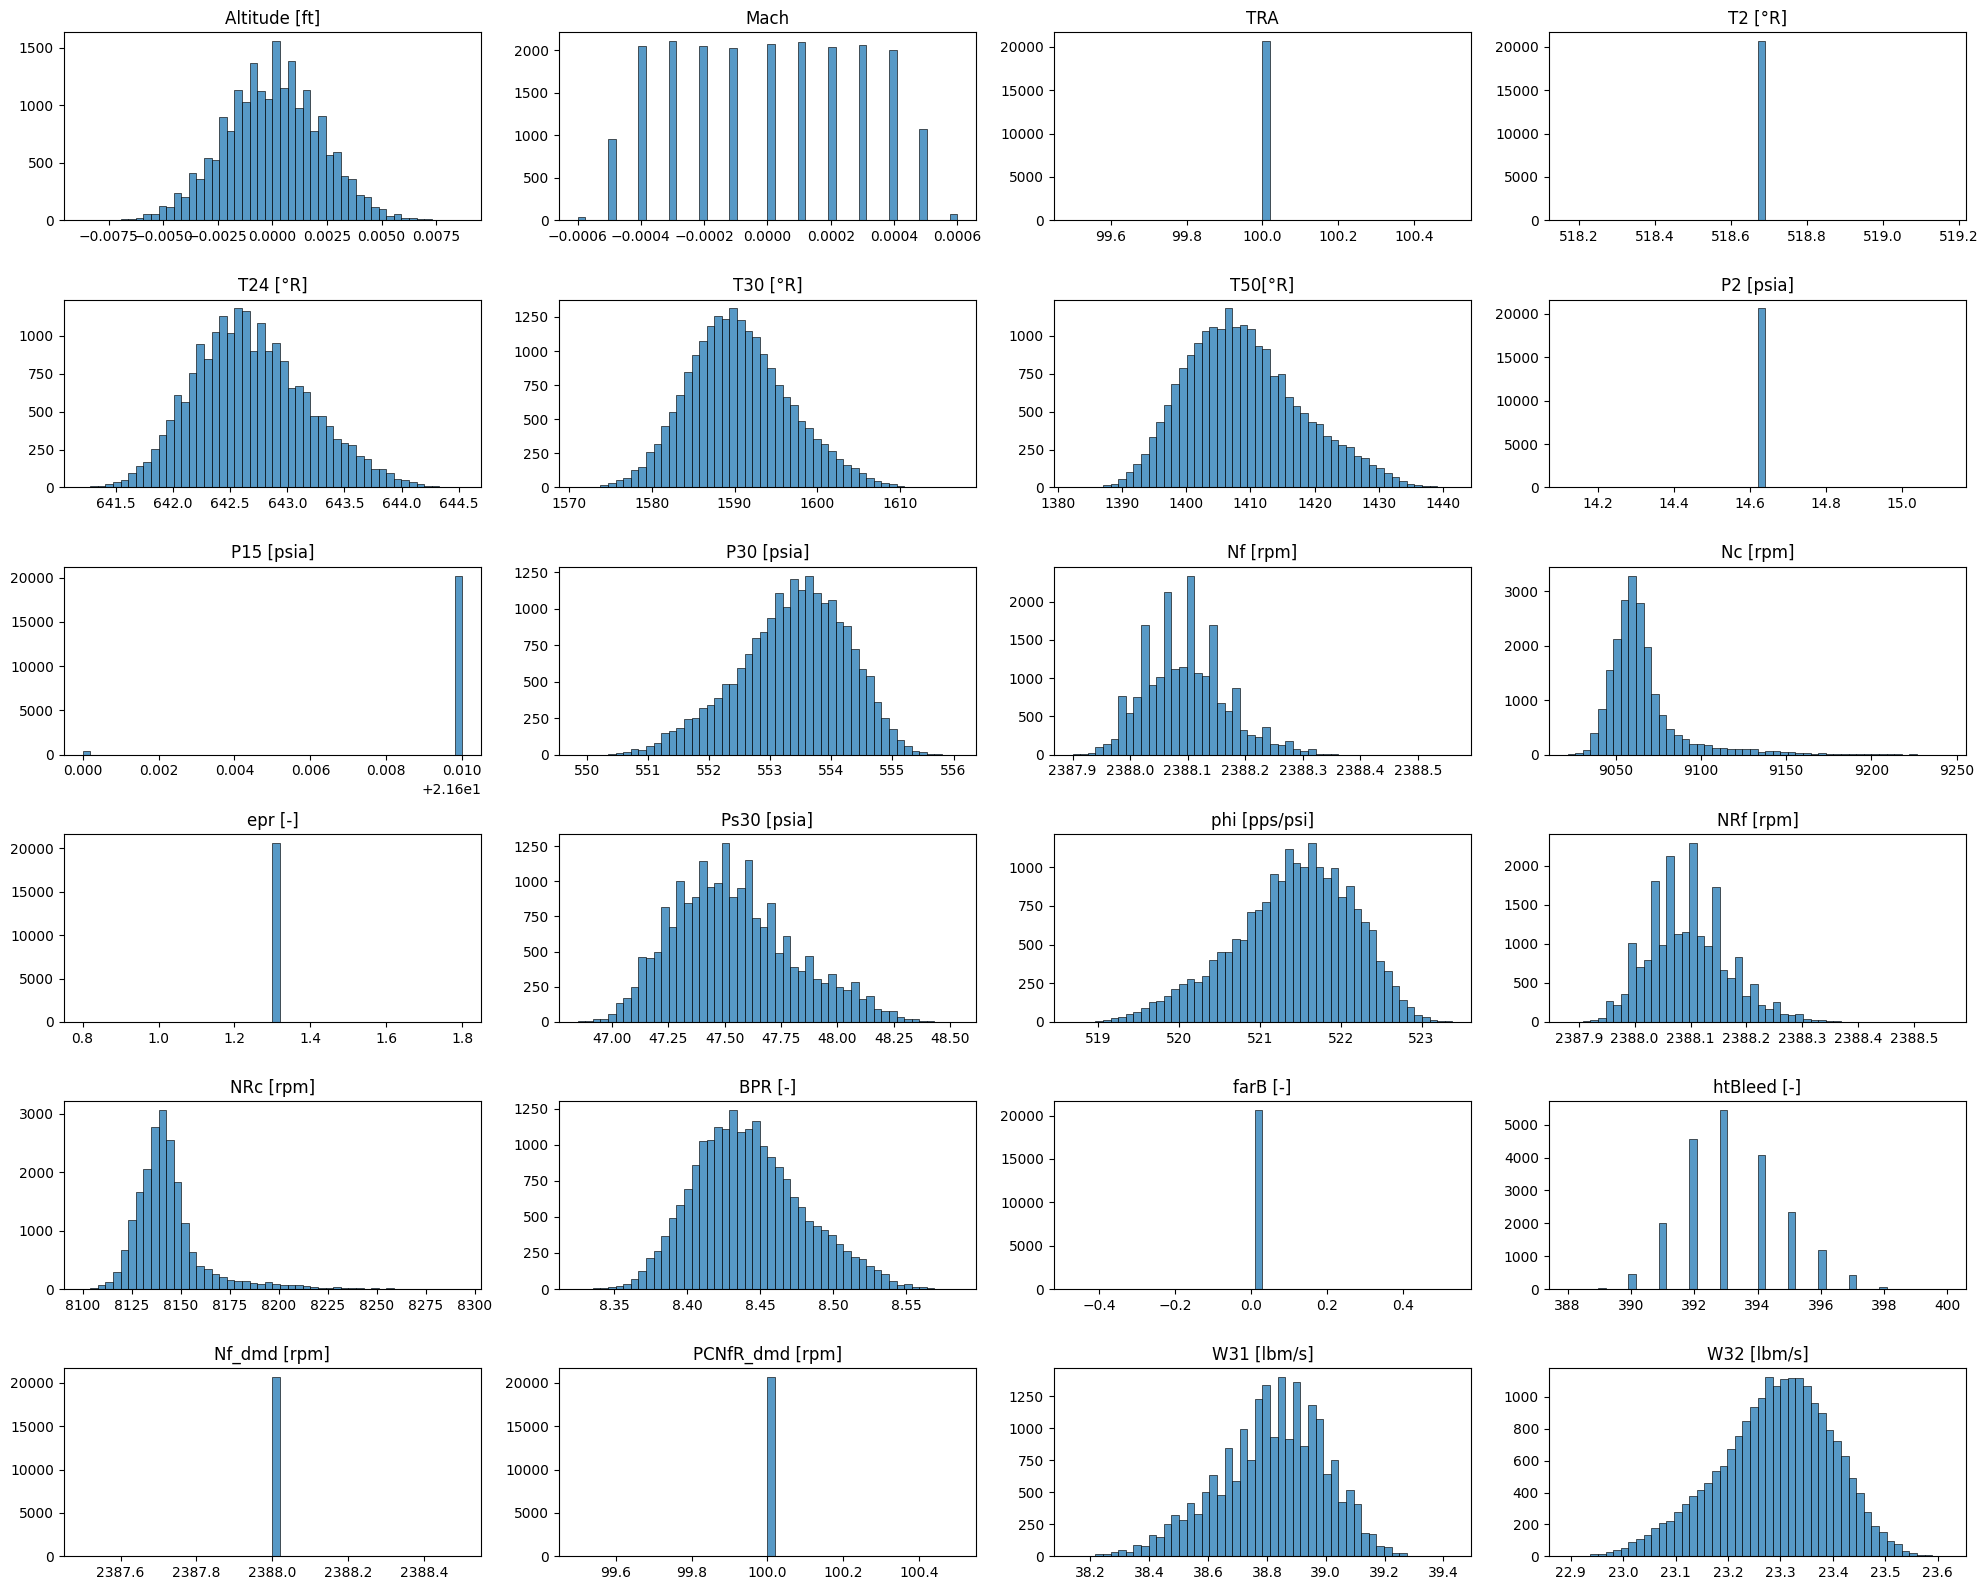

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(20,16))
axes=axes.ravel()
for i,item in enumerate(fd001_train.columns[2:]):
    sns.histplot(fd001_train[item],bins=50,ax=axes[i])
    axes[i].set_title(f'{item}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('') 

plt.tight_layout()
plt.show()

In [121]:
features_train =fd001_train.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]','epr [-]',
                                    'farB [-]', 'PCNfR_dmd [rpm]'])

features_test =fd001_test.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]','epr [-]',
                                    'farB [-]','PCNfR_dmd [rpm]']) 

In [122]:
##Normalização

In [123]:
from sklearn.preprocessing import MinMaxScaler

In [124]:
features=features_train.columns[2:]
scaler = MinMaxScaler()
features_train[features] = scaler.fit_transform(features_train[features])
features_test[features]=scaler.transform(features_test[features]) 

In [125]:
##Definição dos targets para regressão e classificação nos dados de treino

In [126]:
limit_r = 130 
max_ciclos = fd001_train.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_train = []
for m in fd001_train['ID'].unique():
    motor = fd001_train[fd001_train['ID']==m]
    aux=[]
    for k in range(len(motor['Nº Ciclos'])):
        if k+1 <= max_ciclos['Nº Ciclos'].iloc[m-1]-limit_r:
            aux.append(limit_r)
        else:
            aux.append(max_ciclos['Nº Ciclos'].iloc[m-1]-
                       motor['Nº Ciclos'].iloc[k]) 
    rul_train.extend(aux) 
rul_train = [int(x) for x in rul_train]

In [127]:
##Visualização de um ciclo de vida de um motor

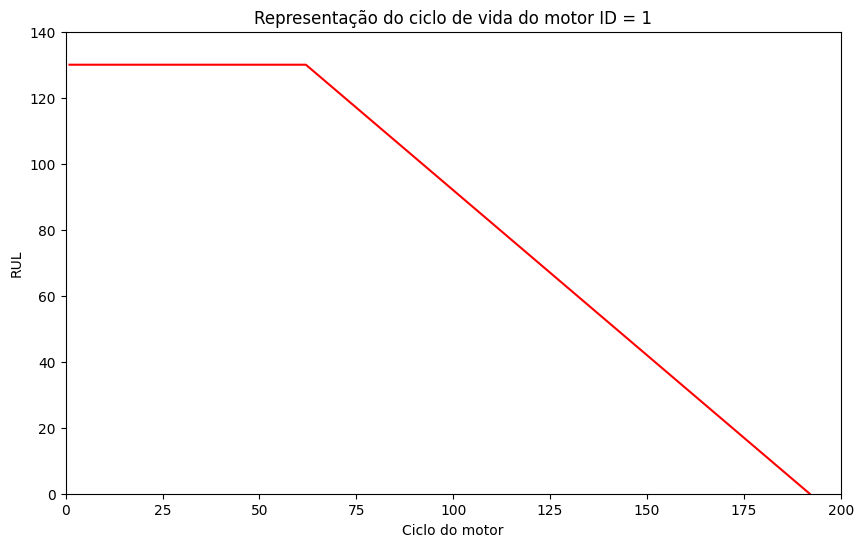

In [128]:
exemplo = fd001_train[fd001_train['ID']==1]
l=len(exemplo['Nº Ciclos'])

plt.figure(figsize=(10,6))

plt.plot(exemplo['Nº Ciclos'].iloc[0:l],rul_train[0:l],c='red')
plt.title('Representação do ciclo de vida do motor ID = 1')
plt.ylim(0,140)
plt.xlim(0,200)
plt.xlabel('Ciclo do motor')
plt.ylabel('RUL')
plt.show()

In [129]:
##Definição dos targets para regressão e classificação nos dados de teste 

In [130]:
max_ciclos_test = fd001_test.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_test = []
for m in fd001_test['ID'].unique():
    engine = fd001_test[fd001_test['ID']==m]
    for k in range(len(engine['Nº Ciclos'])):
        rul_aux=(max_ciclos_test['Nº Ciclos'].iloc[m-1]-
                 engine['Nº Ciclos'].iloc[k])
        v = rul_aux+rul001['rul'].iloc[m-1]
        if v >= limit_r:
            rul_test.append(limit_r)
        else:
            rul_test.append(v)
rul_test = [int(x) for x in rul_test]

In [131]:
##Criação das janelas de tempo para dados de treino e de teste

In [132]:
def time_window(data,rul,window_size,step):
    x,y_r,y_c = [], [], []
    l=0
    for m in data['ID'].unique():
        engine = data[data['ID']==m]
        for i in range(0,len(engine)-window_size+1,step):
            f= i + window_size
            x.append(engine.iloc[i:f,2:].values)
            y_r.append(rul[l+f-1]) 
        l += len(engine)
    return np.array(x), np.array(y_r)
window_size = 30
step = 1
x_train, y_train_r= time_window(features_train,rul_train,window_size,step)

print(x_train.shape,y_train_r.shape)  

x_test, y_test_r= time_window(features_test,rul_test,window_size,step)
print(x_test.shape,y_test_r.shape)

(17731, 30, 17) (17731,)
(10196, 30, 17) (10196,)


In [133]:
##Separação das variáveis de treino e teste

In [134]:
from sklearn.model_selection import train_test_split

x1,x2,y1,y2 = train_test_split(x_train,y_train_r,test_size=0.2,random_state=1)

x1=x1.astype('float32')
x2=x2.astype('float32')
y1=y1.astype('float32')
y2=y2.astype('float32')

In [135]:
##Criação do modelo LSTM e treinamento

In [136]:
from tensorflow import keras 
from keras import layers
from keras.models import Sequential
from keras.metrics import AUC
from keras.layers import LSTM,Dense,Dropout,Bidirectional
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf 
import keras_tuner
import time  

shape1 = (x1.shape[1], x1.shape[2])

model_lstm=Sequential()
model_lstm.add(LSTM(64,activation='tanh',
                return_sequences=True,input_shape=shape1))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(64,activation='tanh',
                return_sequences=True))
model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(128,activation='tanh',
                return_sequences=True))
model_lstm.add(Dropout(0.3))
model_lstm.add(LSTM(160,activation='tanh',
                return_sequences=False))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(192,activation='relu'))
model_lstm.add(Dense(1,activation='linear'))

model_lstm.compile(optimizer=RMSprop(learning_rate=0.001), 
                loss='mse', 
            metrics=['mean_squared_error','mean_absolute_error'])

c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [137]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - loss: 4148.8882 - mean_absolute_error: 53.9343 - mean_squared_error: 4148.8882

71/71 ━━━━━━━━━━━━━━━━━━━━ 45s 520ms/step - loss: 2713.5505 - mean_absolute_error: 44.3484 - mean_squared_error: 2713.5505 - val_loss: 1805.8970 - val_mean_absolute_error: 37.9232 - val_mean_squared_error: 1805.8970
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - loss: 1449.9877 - mean_absolute_error: 32.3362 - mean_squared_error: 1449.9877

71/71 ━━━━━━━━━━━━━━━━━━━━ 37s 521ms/step - loss: 1140.1599 - mean_absolute_error: 28.1750 - mean_squared_error: 1140.1599 - val_loss: 623.2740 - val_mean_absolute_error: 20.6374 - val_mean_squared_error: 623.2740
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - loss: 759.5211 - mean_absolute_error: 22.1652 - mean_squared_error: 759.5211

71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 552ms/step - loss: 695.3177 - mean_absolute_error: 21.0006 - mean_squared_error: 695.3177 - val_loss: 375.8300 - val_mean_absolute_error: 15.6132 - val_mean_squared_error: 375.8300
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - loss: 528.0836 - mean_absolute_error: 18.0480 - mean_squared_error: 528.0836

71/71 ━━━━━━━━━━━━━━━━━━━━ 38s 534ms/step - loss: 514.0988 - mean_absolute_error: 17.7297 - mean_squared_error: 514.0988 - val_loss: 363.6143 - val_mean_absolute_error: 14.7432 - val_mean_squared_error: 363.6143
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - loss: 468.7679 - mean_absolute_error: 16.7384 - mean_squared_error: 468.7679

71/71 ━━━━━━━━━━━━━━━━━━━━ 37s 526ms/step - loss: 445.6743 - mean_absolute_error: 16.3273 - mean_squared_error: 445.6743 - val_loss: 415.0371 - val_mean_absolute_error: 14.4185 - val_mean_squared_error: 415.0371
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - loss: 414.2412 - mean_absolute_error: 15.4806 - mean_squared_error: 414.2412

71/71 ━━━━━━━━━━━━━━━━━━━━ 37s 527ms/step - loss: 403.0304 - mean_absolute_error: 15.3211 - mean_squared_error: 403.0304 - val_loss: 340.4942 - val_mean_absolute_error: 14.2556 - val_mean_squared_error: 340.4942
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - loss: 378.9940 - mean_absolute_error: 14.7707 - mean_squared_error: 378.9940

71/71 ━━━━━━━━━━━━━━━━━━━━ 36s 514ms/step - loss: 373.6443 - mean_absolute_error: 14.6917 - mean_squared_error: 373.6443 - val_loss: 346.1791 - val_mean_absolute_error: 12.4459 - val_mean_squared_error: 346.1791
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - loss: 368.1996 - mean_absolute_error: 14.5760 - mean_squared_error: 368.1996

71/71 ━━━━━━━━━━━━━━━━━━━━ 34s 473ms/step - loss: 360.6792 - mean_absolute_error: 14.4469 - mean_squared_error: 360.6791 - val_loss: 251.6084 - val_mean_absolute_error: 12.1467 - val_mean_squared_error: 251.6084
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - loss: 349.1936 - mean_absolute_error: 14.1809 - mean_squared_error: 349.1936

71/71 ━━━━━━━━━━━━━━━━━━━━ 37s 515ms/step - loss: 340.3431 - mean_absolute_error: 14.0118 - mean_squared_error: 340.3431 - val_loss: 294.6205 - val_mean_absolute_error: 12.8563 - val_mean_squared_error: 294.6205
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - loss: 315.0795 - mean_absolute_error: 13.4426 - mean_squared_error: 315.0795

71/71 ━━━━━━━━━━━━━━━━━━━━ 38s 534ms/step - loss: 328.0683 - mean_absolute_error: 13.7305 - mean_squared_error: 328.0683 - val_loss: 237.6922 - val_mean_absolute_error: 12.0437 - val_mean_squared_error: 237.6922


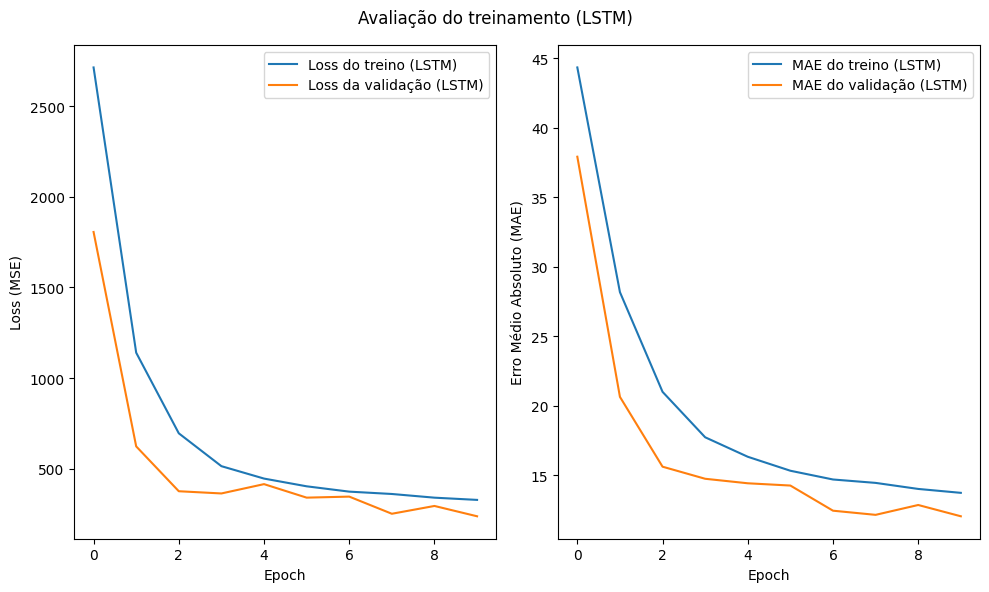

In [138]:
start=time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = ModelCheckpoint('lstm_model_.h5', monitor='val_loss')
history_lstm=model_lstm.fit(x1,y1,validation_data=(x2,y2),epochs=10,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint]) 

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Loss do treino (LSTM)')
plt.plot(history_lstm.history['val_loss'], label='Loss da validação (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['mean_absolute_error'], label='MAE do treino (LSTM)')
plt.plot(history_lstm.history['val_mean_absolute_error'], label='MAE do validação (LSTM)')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (LSTM)')
plt.tight_layout()
plt.show()

In [139]:
##Testando o modelo com os dados de teste 

In [140]:
rul_prev_r = model_lstm.predict(x_test).reshape(-1)
rul_prev_r = [float(x) for x in rul_prev_r]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step


In [141]:
##Avaliando o modelo

247.59870256002074
15.74
0.14466735704978115
12.596513741153883
0.7499850750739758
Tempo de 396.28257417678833s


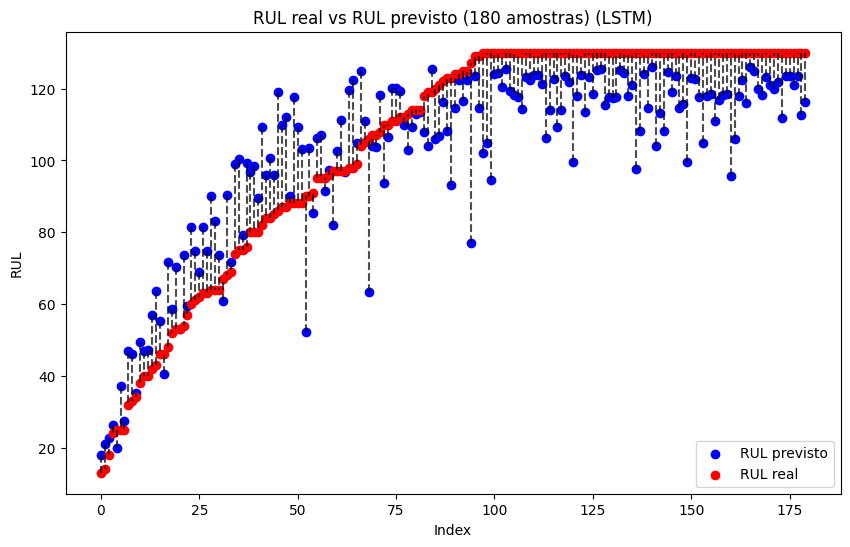

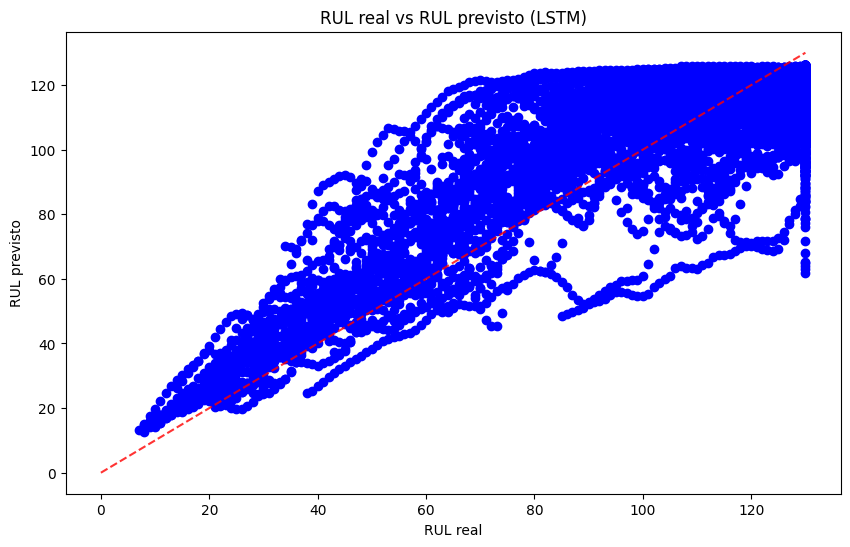

In [142]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test_r,rul_prev_r))
print(f'{np.sqrt(mean_squared_error(y_test_r,rul_prev_r)):.2f}')
print(mean_absolute_percentage_error(y_test_r,rul_prev_r))
print(mean_absolute_error(y_test_r,rul_prev_r))
print(r2_score(y_test_r,rul_prev_r))  
print(f'Tempo de {end-start}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev_r),size=n_amostras,replace=False)
y_real_amostra_r=np.array(y_test_r)[indices]
y_prev_amostra_r=np.array(rul_prev_r)[indices]
ordem = np.argsort(y_real_amostra_r)
y_real_amostra_r=y_real_amostra_r[ordem]
y_prev_amostra_r=y_prev_amostra_r[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra_r,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra_r,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (LSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra_r[i],y_real_amostra_r[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test_r,rul_prev_r,c='blue')
plt.plot([0,limit_r],[0,limit_r],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (LSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()

In [143]:
##Criando modelo BiLSTM

In [144]:
model_bi=Sequential()
model_bi.add(Bidirectional(LSTM(224,activation='tanh',
                return_sequences=True,input_shape=shape1)))
model_bi.add(Dropout(0.5))
model_bi.add(Bidirectional(LSTM(224,activation='tanh',
                return_sequences=True)))
model_bi.add(Dropout(0.2))
model_bi.add(Bidirectional(LSTM(128,activation='tanh',
                return_sequences=True)))
model_bi.add(Dropout(0.4))
model_bi.add(Bidirectional(LSTM(224,activation='tanh',
                return_sequences=False)))
model_bi.add(Dropout(0.5))
model_bi.add(Dense(224,activation='relu'))
model_bi.add(Dense(192,activation='relu'))
model_bi.add(Dense(1,activation='linear'))

model_bi.compile(optimizer=RMSprop(learning_rate=0.001), 
                loss='mse', 
            metrics=['mean_squared_error','mean_absolute_error'])

c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [145]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 2864.2661 - mean_absolute_error: 44.2780 - mean_squared_error: 2864.2661

71/71 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - loss: 1815.0947 - mean_absolute_error: 35.3104 - mean_squared_error: 1815.0947 - val_loss: 1619.1997 - val_mean_absolute_error: 31.3144 - val_mean_squared_error: 1619.1997
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 981.7417 - mean_absolute_error: 25.2505 - mean_squared_error: 981.7417

71/71 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - loss: 884.7276 - mean_absolute_error: 23.7590 - mean_squared_error: 884.7276 - val_loss: 823.3896 - val_mean_absolute_error: 23.4747 - val_mean_squared_error: 823.3896
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 717.6206 - mean_absolute_error: 21.3312 - mean_squared_error: 717.6207

71/71 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - loss: 675.5439 - mean_absolute_error: 20.5613 - mean_squared_error: 675.5439 - val_loss: 419.3491 - val_mean_absolute_error: 16.2425 - val_mean_squared_error: 419.3491
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 604.0504 - mean_absolute_error: 19.0946 - mean_squared_error: 604.0504

71/71 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - loss: 595.6185 - mean_absolute_error: 18.9160 - mean_squared_error: 595.6185 - val_loss: 422.9684 - val_mean_absolute_error: 15.7860 - val_mean_squared_error: 422.9684
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 506.5727 - mean_absolute_error: 17.4510 - mean_squared_error: 506.5727

71/71 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - loss: 516.9715 - mean_absolute_error: 17.5813 - mean_squared_error: 516.9715 - val_loss: 571.3788 - val_mean_absolute_error: 16.5635 - val_mean_squared_error: 571.3788
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 458.6508 - mean_absolute_error: 16.3388 - mean_squared_error: 458.6508

71/71 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - loss: 444.1007 - mean_absolute_error: 16.1441 - mean_squared_error: 444.1007 - val_loss: 399.2156 - val_mean_absolute_error: 15.9914 - val_mean_squared_error: 399.2156
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 423.5818 - mean_absolute_error: 15.7643 - mean_squared_error: 423.5818

71/71 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - loss: 436.5190 - mean_absolute_error: 15.9626 - mean_squared_error: 436.5190 - val_loss: 293.8052 - val_mean_absolute_error: 12.1552 - val_mean_squared_error: 293.8052
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 384.8710 - mean_absolute_error: 14.9647 - mean_squared_error: 384.8710

71/71 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - loss: 393.0132 - mean_absolute_error: 15.1382 - mean_squared_error: 393.0132 - val_loss: 274.7567 - val_mean_absolute_error: 11.4519 - val_mean_squared_error: 274.7567
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 385.2843 - mean_absolute_error: 15.0228 - mean_squared_error: 385.2843

71/71 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - loss: 384.2177 - mean_absolute_error: 15.0013 - mean_squared_error: 384.2177 - val_loss: 402.4394 - val_mean_absolute_error: 14.3317 - val_mean_squared_error: 402.4394
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 367.3686 - mean_absolute_error: 14.5258 - mean_squared_error: 367.3686

71/71 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - loss: 379.0153 - mean_absolute_error: 14.7866 - mean_squared_error: 379.0153 - val_loss: 381.5947 - val_mean_absolute_error: 15.4841 - val_mean_squared_error: 381.5947


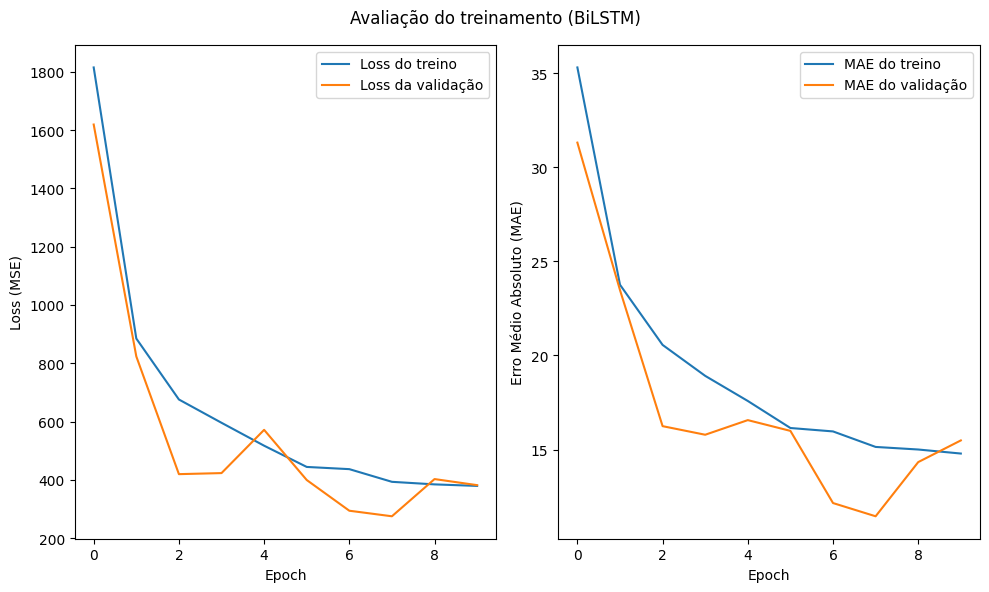

In [146]:
start=time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = ModelCheckpoint('bi_model_r.h5', monitor='val_loss')
history_bi=model_bi.fit(x1,y1,validation_data=(x2,y2),epochs=10,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_bi.history['loss'], label='Loss do treino')
plt.plot(history_bi.history['val_loss'], label='Loss da validação')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_bi.history['mean_absolute_error'], label='MAE do treino')
plt.plot(history_bi.history['val_mean_absolute_error'], label='MAE do validação')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (BiLSTM)')
plt.tight_layout()
plt.show()

In [147]:
##Testando o modelo com os dados de teste

In [148]:
rul_prev_r = model_bi.predict(x_test).reshape(-1)
rul_prev_r = [float(x) for x in rul_prev_r]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 51s 153ms/step


In [149]:
##Avaliando o modelo

452.77087376970525
21.28
0.17377483771717858
18.039425522217613
0.5428107060182097
Tempo de 1008.1050939559937s


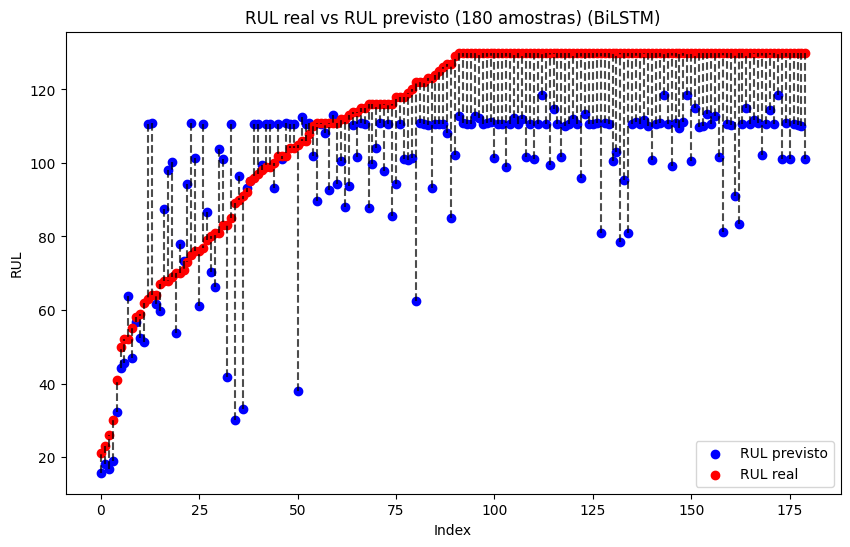

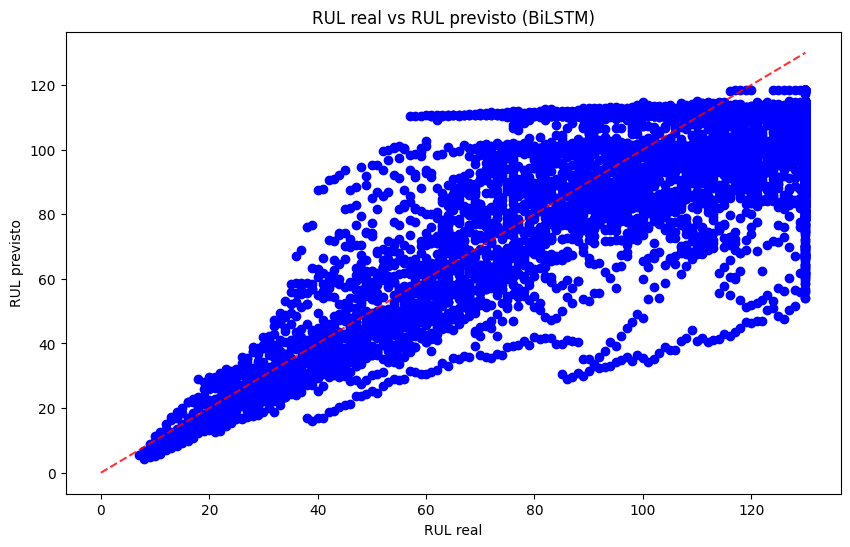

In [150]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test_r,rul_prev_r))
print(f'{np.sqrt(mean_squared_error(y_test_r,rul_prev_r)):.2f}')
print(mean_absolute_percentage_error(y_test_r,rul_prev_r))
print(mean_absolute_error(y_test_r,rul_prev_r))
print(r2_score(y_test_r,rul_prev_r))  
print(f'Tempo de {end-start}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev_r),size=n_amostras,replace=False)
y_real_amostra_r=np.array(y_test_r)[indices]
y_prev_amostra_r=np.array(rul_prev_r)[indices]
ordem = np.argsort(y_real_amostra_r)
y_real_amostra_r=y_real_amostra_r[ordem]
y_prev_amostra_r=y_prev_amostra_r[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra_r,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra_r,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (BiLSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra_r[i],y_real_amostra_r[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test_r,rul_prev_r,c='blue')
plt.plot([0,limit_r],[0,limit_r],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (BiLSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()